In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 90% 134M/149M [00:00<00:00, 160MB/s]
100% 149M/149M [00:01<00:00, 143MB/s]


Unique classes found: {'pituitary', 'glioma', 'meningioma', 'notumor'}
Sample class paths: ['/content/Training/notumor/Tr-no_0923.jpg', '/content/Training/notumor/Tr-no_0146.jpg', '/content/Training/notumor/Tr-no_1491.jpg', '/content/Training/notumor/Tr-no_1500.jpg', '/content/Training/notumor/Tr-no_0363.jpg']
                                 Class Path    Class
0  /content/Training/notumor/Tr-no_0923.jpg  notumor
1  /content/Training/notumor/Tr-no_0146.jpg  notumor
2  /content/Training/notumor/Tr-no_1491.jpg  notumor
3  /content/Training/notumor/Tr-no_1500.jpg  notumor
4  /content/Training/notumor/Tr-no_0363.jpg  notumor
Total rows in training DataFrame: 5712
Class distribution in training DataFrame:
 Class
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64


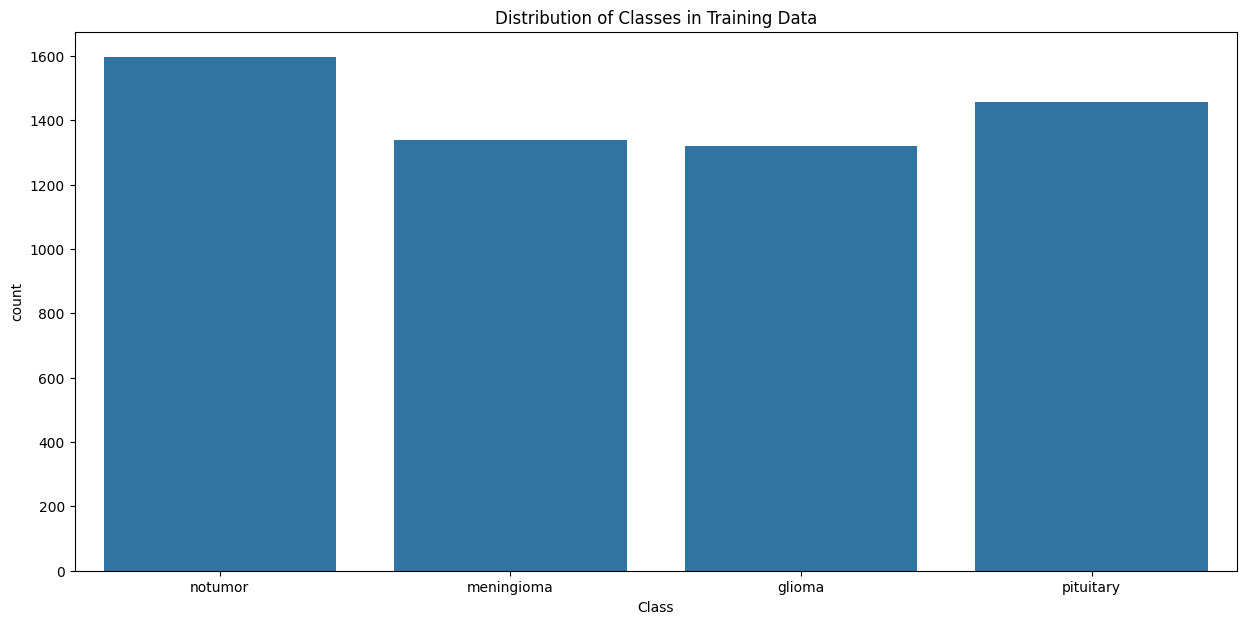

In [ ]:
import os
import pandas as pd

def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the main path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory (to exclude any non-folder files if they exist)
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Print the unique classes found and a sample of class paths for debugging
    print("Unique classes found:", set(classes))
    print("Sample class paths:", class_paths[:5])  # Display first 5 paths for verification

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df

# Example usage
train_path = '/content/Training'  # Adjust the path to your training data directory
tr_df = get_class_paths(train_path)

# Display the resulting DataFrame
print(tr_df.head())
print("Total rows in training DataFrame:", len(tr_df))
print("Class distribution in training DataFrame:\n", tr_df['Class'].value_counts())

# Check if the DataFrame contains multiple classes before plotting
if tr_df['Class'].nunique() > 1:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(15, 7))
    ax = sns.countplot(data=tr_df, x='Class')
    ax.set_title("Distribution of Classes in Training Data")
    plt.show()
else:
    print("Warning: Only one unique class detected. Check your directory structure or labels.")


In [ ]:
ts_df

,Class Path,Class
1055,/content/Testing/pituitary/Te-pi_0077.jpg,pituitary
397,/content/Testing/notumor/Te-no_0273.jpg,notumor
1206,/content/Testing/pituitary/Te-pi_0162.jpg,pituitary
33,/content/Testing/notumor/Te-no_0242.jpg,notumor
471,/content/Testing/meningioma/Te-me_0204.jpg,meningioma
...,...,...
1128,/content/Testing/pituitary/Te-pi_0094.jpg,pituitary
1083,/content/Testing/pituitary/Te-piTr_0008.jpg,pituitary
924,/content/Testing/glioma/Te-gl_0120.jpg,glioma
880,/content/Testing/glioma/Te-gl_0203.jpg,glioma


In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0923.jpg,notumor
1,/content/Training/notumor/Tr-no_0146.jpg,notumor
2,/content/Training/notumor/Tr-no_1491.jpg,notumor
3,/content/Training/notumor/Tr-no_1500.jpg,notumor
4,/content/Training/notumor/Tr-no_0363.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0237.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0783.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0557.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0968.jpg,pituitary


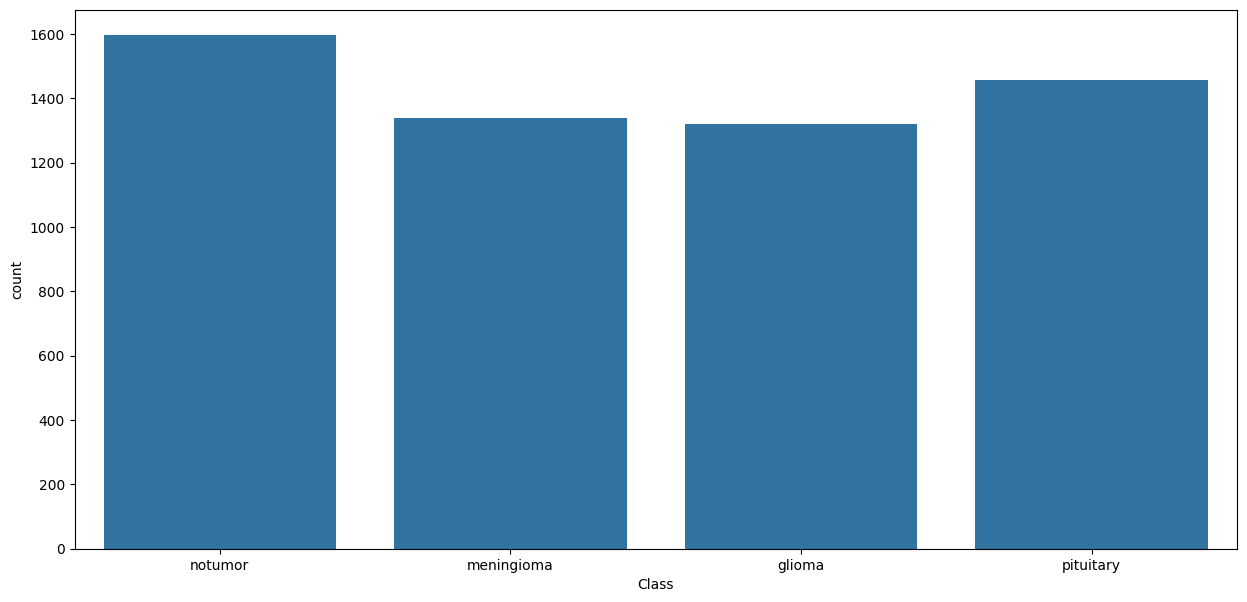

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
valid_tf, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_tf

,Class Path,Class
218,/content/Testing/notumor/Te-no_0320.jpg,notumor
842,/content/Testing/glioma/Te-gl_0205.jpg,glioma
1253,/content/Testing/pituitary/Te-pi_0165.jpg,pituitary
812,/content/Testing/glioma/Te-gl_0121.jpg,glioma
803,/content/Testing/glioma/Te-gl_0168.jpg,glioma
...,...,...
588,/content/Testing/meningioma/Te-me_0159.jpg,meningioma
997,/content/Testing/glioma/Te-gl_0274.jpg,glioma
936,/content/Testing/glioma/Te-gl_0170.jpg,glioma
66,/content/Testing/notumor/Te-no_0352.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
1231,/content/Testing/pituitary/Te-pi_0158.jpg,pituitary
15,/content/Testing/notumor/Te-no_0253.jpg,notumor
1209,/content/Testing/pituitary/Te-pi_0261.jpg,pituitary
478,/content/Testing/meningioma/Te-me_0192.jpg,meningioma
331,/content/Testing/notumor/Te-no_0261.jpg,notumor
...,...,...
1230,/content/Testing/pituitary/Te-pi_0219.jpg,pituitary
995,/content/Testing/glioma/Te-gl_0275.jpg,glioma
896,/content/Testing/glioma/Te-gl_0132.jpg,glioma
958,/content/Testing/glioma/Te-gl_0020.jpg,glioma


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gene = ImageDataGenerator(rescale=1/255)

In [ ]:
# Assuming train_test_split and necessary libraries are already imported
# Define batch size and image size
batch_size = 32
img_size = (299, 299)

# Data preparation step (ensure consistent splits)
train_df, valid_df = train_test_split(tr_df, test_size=0.2, stratify=tr_df['Class'], random_state=42)

# Verification step: Print DataFrame row counts
print("Training DataFrame rows:", len(train_df))
print("Validation DataFrame rows:", len(valid_df))
print("Testing DataFrame rows:", len(ts_df))  # Ensure `ts_df` is correctly defined

# Define the ImageDataGenerators
image_generator = ImageDataGenerator(rescale=1./255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1./255)

# Training generator
tr_gen = image_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
    class_mode='categorical'
)

# Validation generator
valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
    class_mode='categorical'
)

# Testing generator
ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False
)




Training DataFrame rows: 4569
Validation DataFrame rows: 1143
Testing DataFrame rows: 328
Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 328 validated image filenames belonging to 4 classes.


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size and image size
batch_size = 32
img_size = (299, 299)

# Ensure tr_df contains the entire dataset each time
print("Original dataset row count:", len(tr_df))  # Verification of dataset size

# Perform train-validation split only once
train_df, valid_df = train_test_split(tr_df, test_size=0.2, stratify=tr_df['Class'], random_state=42)

# Print row counts for each DataFrame to confirm consistency
print("Training DataFrame rows:", len(train_df))
print("Validation DataFrame rows:", len(valid_df))
print("Testing DataFrame rows:", len(ts_df))  # ts_df should be predefined or consistently loaded

# Define the ImageDataGenerators
image_generator = ImageDataGenerator(rescale=1./255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1./255)

# Training data generator
tr_gen = image_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
    class_mode='categorical'
)

# Validation data generator
valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
    class_mode='categorical'
)

# Testing data generator
ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False
)


Original dataset row count: 5712
Training DataFrame rows: 4569
Validation DataFrame rows: 1143
Testing DataFrame rows: 328
Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 328 validated image filenames belonging to 4 classes.


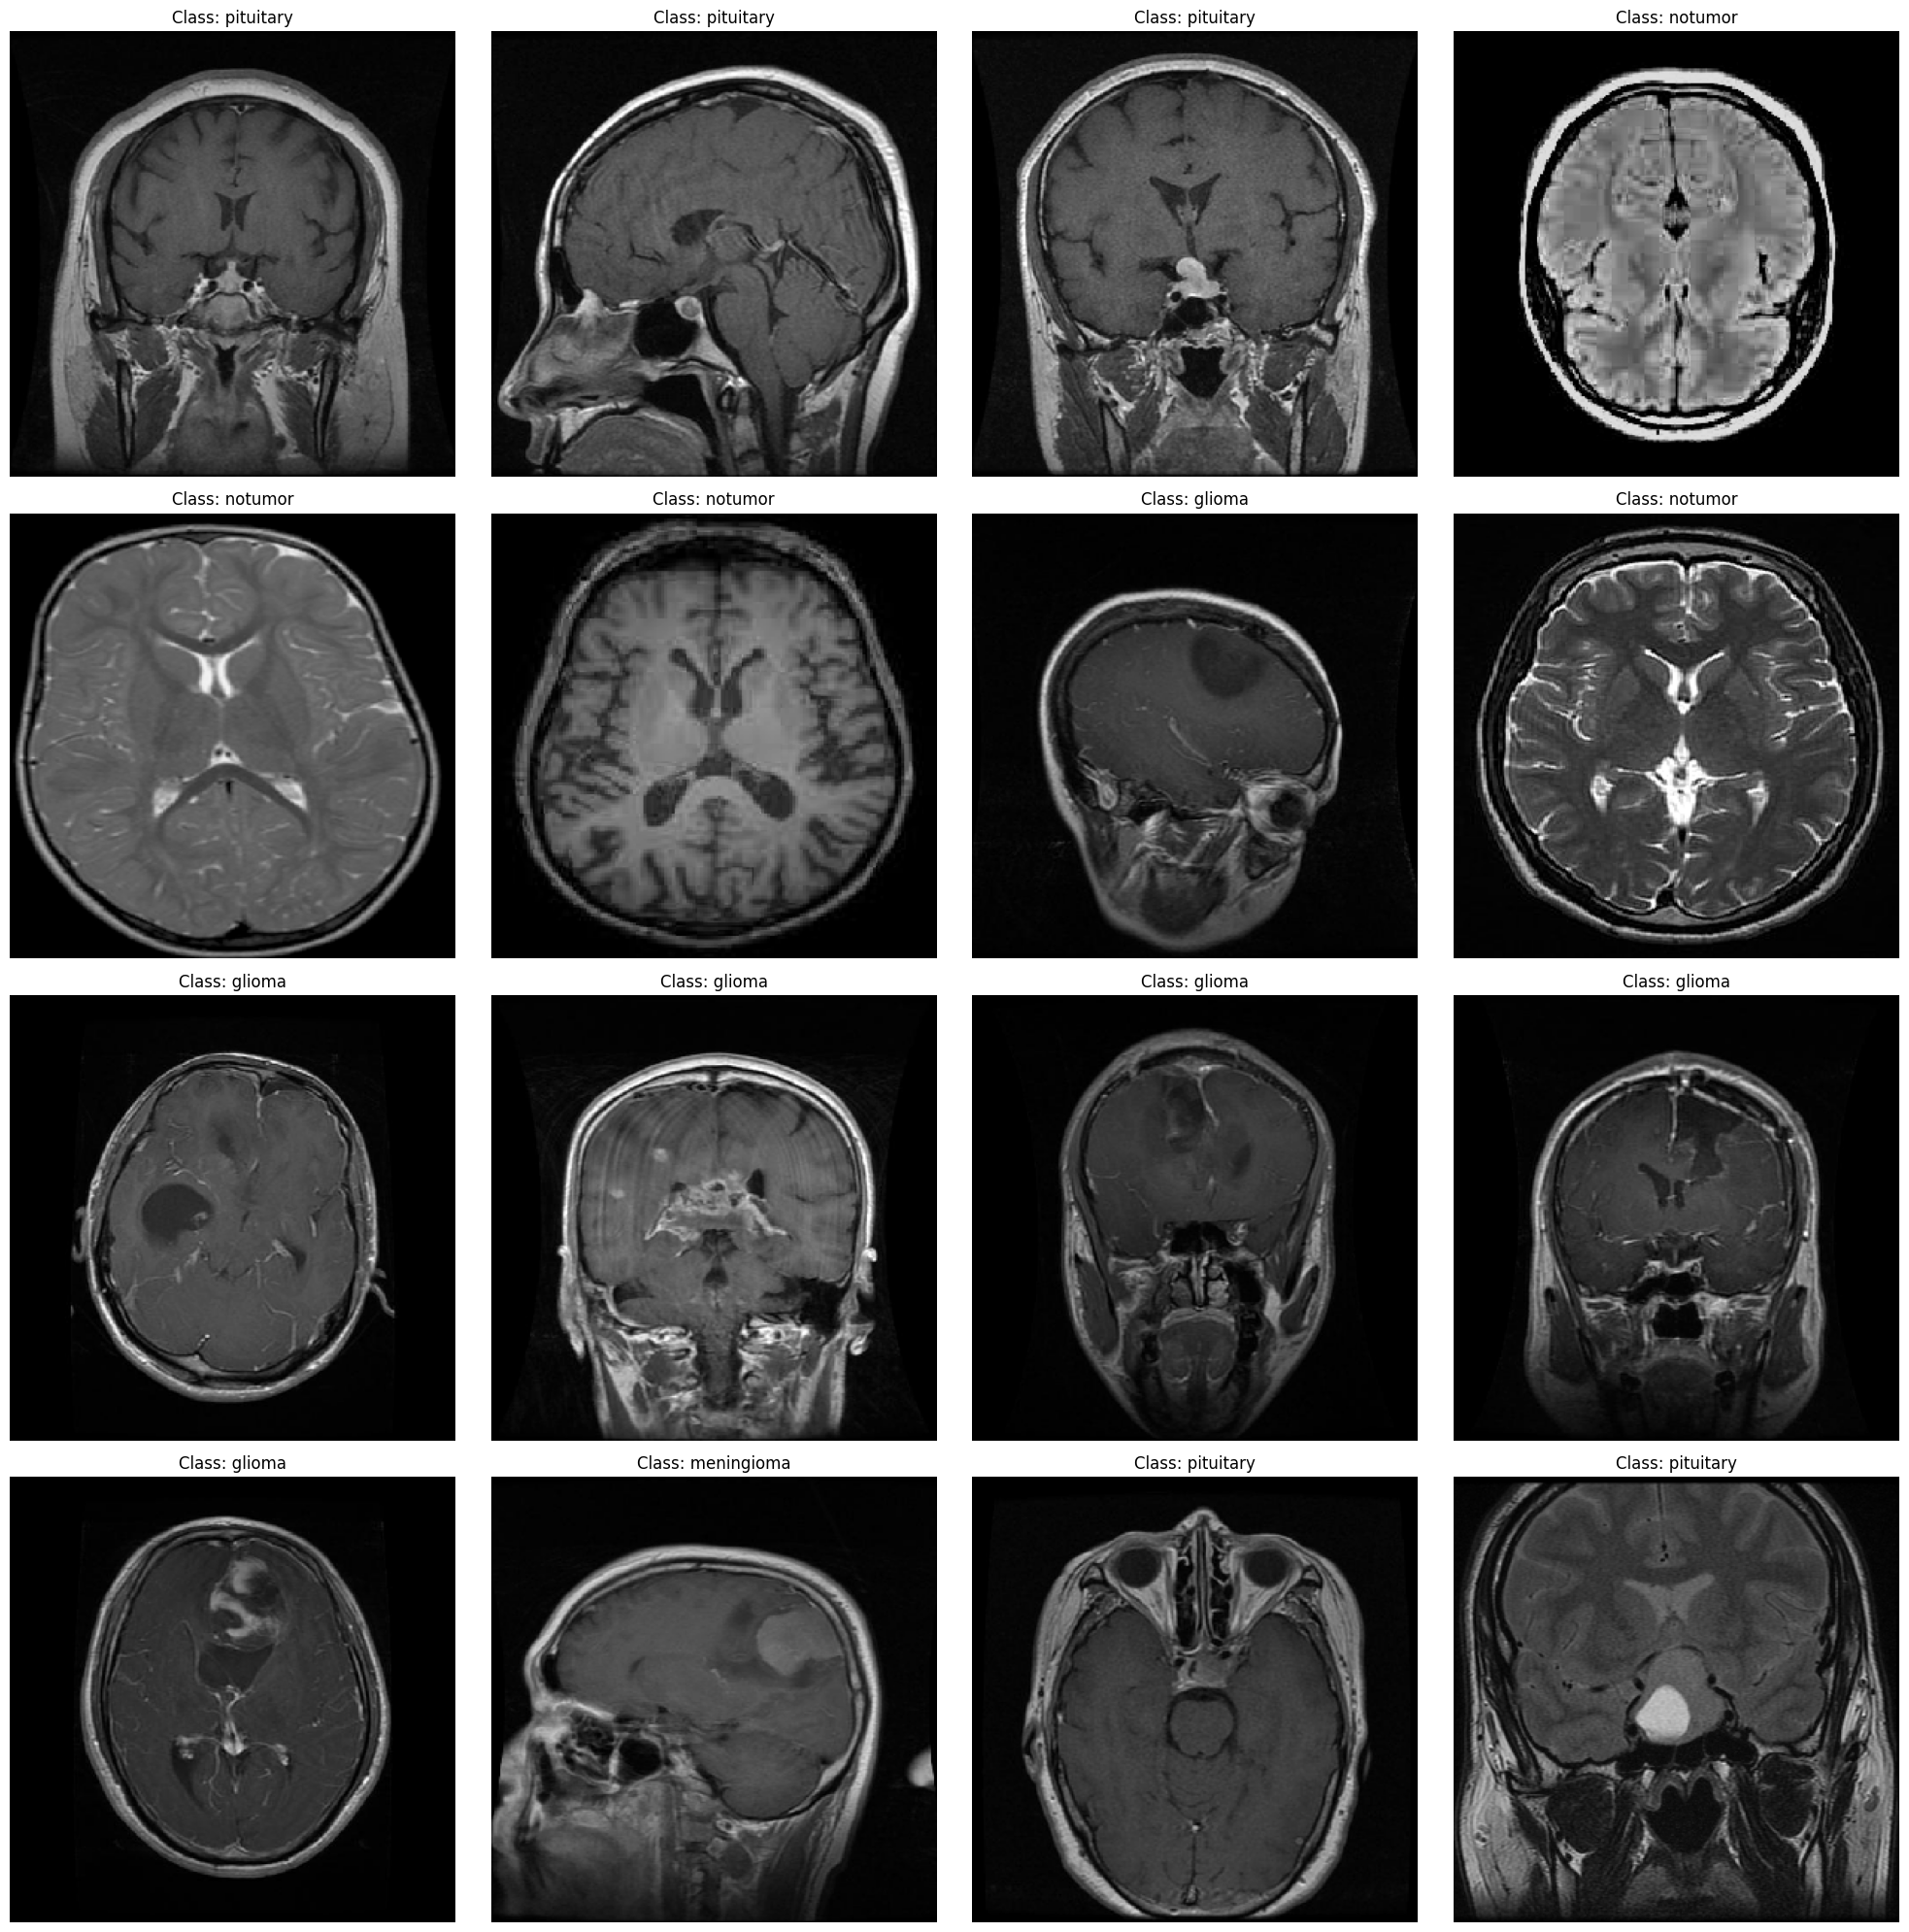

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up a plot with a grid layout of 4x4 images
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)

    # Get the next batch of images and labels from the generator
    batch = next(tr_gen)
    image = batch[0][0]  # First image in the batch
    label = batch[1][0]  # First label in the batch

    # Display the image
    plt.imshow(image)

    # Get the class index from the label (one-hot encoded)
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index position of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Retrieve the class name using the index position
    class_name = class_names[index_position]

    # Set the title of the subplot to display the class name
    plt.title(f"Class: {class_name}")
    plt.axis('off')  # Turn off axis for better visualization

# Adjust layout to prevent overlap and show the plot
plt.tight_layout()
plt.show()
